# Total Effect

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.3.1']


## Test data
We create test data consisting of 6 variables.

In [2]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,2.394708,15.312359,3.685054,0.548814,15.780259,9.948090
1,2.325771,16.145216,4.332293,0.715189,14.335879,9.514409
2,2.197313,15.848718,4.539881,0.602763,14.027410,9.266158
3,1.672250,13.200354,3.675534,0.544883,10.421554,6.771233
4,1.282752,11.337503,3.486211,0.423655,7.533376,5.368668


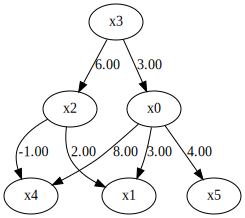

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object and call the `fit` method.

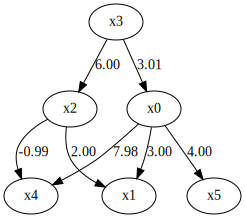

In [4]:
model = lingam.DirectLiNGAM()
model.fit(X)
make_dot(model.adjacency_matrix_)

## Total Effect
To estimate the total effect, we can call `estimate_total_effect` method with lingam model object.

In [5]:
# x3 --> x1
te = model.estimate_total_effect(X, 3, 1)
print(f'total effect: {te:.3f}')

total effect: 21.002


In [6]:
# x2 --> x1
te = model.estimate_total_effect(X, 2, 1)
print('total effect: {:.3f}'.format(te))

total effect: 2.007


In [7]:
# x1 --> x3 (Warning!)
# The causal order of the destination variable is earlier than the source variable.
te = model.estimate_total_effect(X, 1, 3)
print('total effect: {:.3f}'.format(te))

total effect: -0.002


C:\Users\Foo\lingam\base.py:74: UserWarning: The estimated causal effect may be incorrect because the causal order of the destination variable (to_index=3) is earlier than the source variable (from_index=1).
  warnings.warn(f'The estimated causal effect may be incorrect because '
